# Part I - Ford GoBike System Exploration
## by Emmanuel De-Graft

## Introduction
This exploration is of a dataset that defines the rides taken in a bike-sharing system spanning through the Greater San Francisco Bay. 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load data and create copy
rides = pd.read_csv("fordgobike-tripdata.csv", sep=",")
rides.head()
r = rides.copy()


In [3]:
print(rides.shape)
print(rides.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [4]:
#remove lattitude and longitude
r.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)


In [5]:
#Convert datetime from string to datetime
r['start_time'] = pd.to_datetime(r['start_time'])
r['end_time'] = pd.to_datetime(r['end_time'])

r.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
end_station_id                    float64
end_station_name                   object
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [6]:
#drop null values for member birth year
r.dropna(subset=['member_birth_year'], inplace=True)
r[r['member_birth_year'].isnull()].all(axis=1).count()

0

In [7]:
#convert member_birth_year to int64
r['member_birth_year'] = r['member_birth_year'].astype(np.int64)
r.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
end_station_id                    float64
end_station_name                   object
bike_id                             int64
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [8]:
#get start and end year, month, day and hour
start_times = ['start_year', 'start_month', 'start_day','start_hour']
end_times = ['end_year', 'end_month', 'end_day','end_hour']

r['start_year'] = pd.DatetimeIndex(r['start_time']).year
r['start_month'] = pd.DatetimeIndex(r['start_time']).month
r['start_day'] = pd.DatetimeIndex(r['start_time']).day_name()
r['start_day_of_month'] = pd.DatetimeIndex(r['start_time']).day
r['start_hour'] = pd.DatetimeIndex(r['start_time']).hour
r['end_year'] = pd.DatetimeIndex(r['end_time']).year
r['end_month'] = pd.DatetimeIndex(r['end_time']).month
r['end_day'] = pd.DatetimeIndex(r['end_time']).day_name()
r['end_day_of_month'] = pd.DatetimeIndex(r['end_time']).day
r['end_hour'] = pd.DatetimeIndex(r['end_time']).hour



r.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,...,start_year,start_month,start_day,start_day_of_month,start_hour,end_year,end_month,end_day,end_day_of_month,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,...,2019,2,Thursday,28,17,2019,3,Friday,1,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,...,2019,2,Thursday,28,12,2019,3,Friday,1,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,...,2019,2,Thursday,28,17,2019,3,Friday,1,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,...,2019,2,Thursday,28,23,2019,3,Friday,1,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,...,2019,2,Thursday,28,23,2019,3,Friday,1,0


In [9]:
#remove start time and end time
r.drop(['start_time', 'end_time'], axis=1, inplace=True)

In [10]:
r.head()

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_year,start_month,start_day,start_day_of_month,start_hour,end_year,end_month,end_day,end_day_of_month,end_hour
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,2019,2,Thursday,28,17,2019,3,Friday,1,8
2,61854,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,2019,2,Thursday,28,12,2019,3,Friday,1,5
3,36490,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,2019,2,Thursday,28,17,2019,3,Friday,1,4
4,1585,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,2019,2,Thursday,28,23,2019,3,Friday,1,0
5,1793,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,2019,2,Thursday,28,23,2019,3,Friday,1,0


In [11]:
#get member age from birth year and start year
r['member_age'] = r['start_year'] - r['member_birth_year']

#Remove age beyond 90 (life expectancy in San Francisco is 83 years : https://sf.gov/data/health-disparities-dashboard#:~:text=Overall%20Life%20Expectancy%20is%20high,Francisco%20has%20decreased%20since%202014.)
r.drop(r[r['member_age'] >= 90].index, inplace=True) 

In [12]:
#Remove end_station_id, bike_id, start_station_name start_station_id, end_station_name, member_birth_year, start_year, end_year
r.drop(['end_station_id','bike_id','start_station_name', 'start_station_id', 'end_station_name', 'member_birth_year', 'start_year', 'end_year'], axis=1, inplace=True)


In [13]:
r.dtypes
r.head()

,duration_sec,user_type,member_gender,bike_share_for_all_trip,start_month,start_day,start_day_of_month,start_hour,end_month,end_day,end_day_of_month,end_hour,member_age
0,52185,Customer,Male,No,2,Thursday,28,17,3,Friday,1,8,35
2,61854,Customer,Male,No,2,Thursday,28,12,3,Friday,1,5,47
3,36490,Subscriber,Other,No,2,Thursday,28,17,3,Friday,1,4,30
4,1585,Subscriber,Male,Yes,2,Thursday,28,23,3,Friday,1,0,45
5,1793,Subscriber,Male,No,2,Thursday,28,23,3,Friday,1,0,60


In [14]:
r['duration_min'] = round(r['duration_sec']/60, 2)

In [15]:
r.shape

(175070, 14)

### What is the structure of your dataset?

After the preliminary wrangling, the dataset includes 175,070 bike rides with 12 features. There are more categorical variables in this dataset.

### What is/are the main feature(s) of interest in your dataset?

I'm more concerned about the features that show when bikers usually take ride and how long it takes for them to complete a trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the start and end month, year, day, and hour will determine when bikers take their rides. Furthermore, either a customer or  subscriber can influence this analysis.

## Univariate Exploration

I start by visualizing the feature, start day. i.e the day of the month (February) trips were started



In [16]:
#Plot duration
r['duration_min'].describe()

count    175070.000000
mean         11.737280
std          27.365684
min           1.020000
25%           5.380000
50%           8.500000
75%          13.150000
max        1409.130000
Name: duration_min, dtype: float64

Average duration: 11.737280459244875


C:\Users\DEGGIE\AppData\Local\Temp\ipykernel_20312\4155463077.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  n =  r[['duration_min', 'member_age', 'start_day','start_hour', 'end_day', 'end_hour']].mean()


Text(0, 0.5, 'Features')

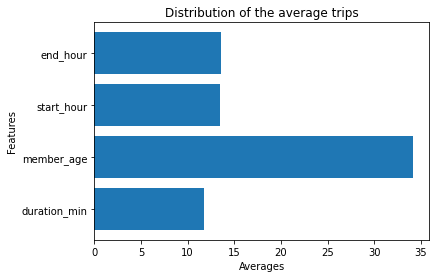

In [17]:
n =  r[['duration_min', 'member_age', 'start_day','start_hour', 'end_day', 'end_hour']].mean()
plt.barh(n.index, n.values)
print("Average duration:",n['duration_min'])
plt.title("Distribution of the average trips")
plt.xlabel("Averages")
plt.ylabel("Features")

After converting the duration from seconds to minutes, the average duration of trips is approximately 11.74, thus the average trip take about 11.74 minutes.

What is the maximum duration of trips taken?

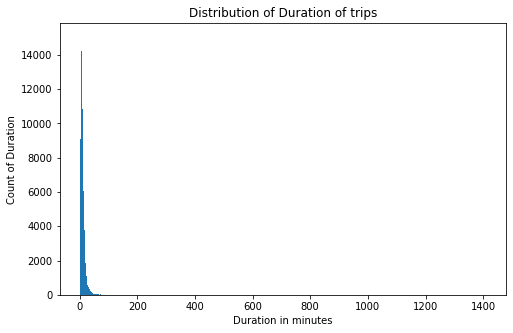

In [18]:
binsize = 1
bins = np.arange(1.2, r['duration_min'].max()+binsize, binsize)
plt.figure(figsize=[8,5])
plt.hist(data=r, x='duration_min', bins=bins)
plt.xlabel("Duration in minutes")
plt.ylabel("Count of Duration")
plt.xlabel("Duration in minutes")
plt.title("Distribution of Duration of trips")
plt.show()

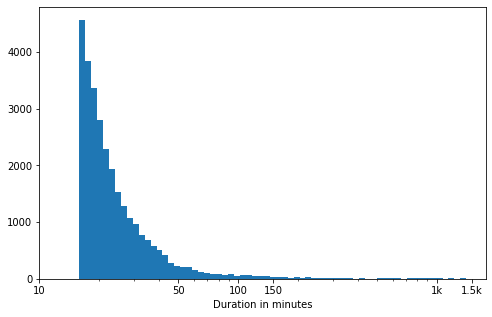

In [19]:
binsize = 0.03
bins = 10 ** np.arange(1.2, np.log10(r['duration_min'].max())+binsize, binsize)
plt.figure(figsize=[8,5])
plt.hist(data=r, x='duration_min', bins=bins)
plt.xscale('log')
plt.xticks([10, 50, 100, 150, 1000, 1500], [10, '50', '100', '150', '1k', '1.5k'])
plt.xlabel("Duration in minutes")
plt.show()

The duration has a thin modal bar between 0 and 200, however, when plotted on a log scale, the distribution is right skewed between 10 and 1.5k. The duration has a smooth decrease in ramp down.

Next, I consider the the feature hour of day

When (Day of the week) are most trips started?

Text(0.5, 1.0, 'Distribution of Start day of trips (Day of the week)')

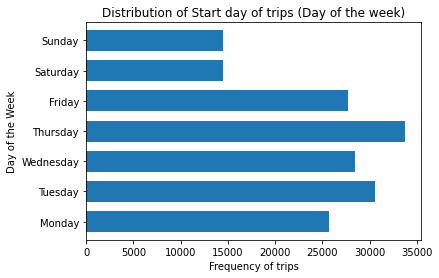

In [20]:
#Plot frequency of start day of the week on bar chart
daysofWeek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
r['start_day'] = pd.Categorical(r['start_day'], daysofWeek)
r['start_day'].value_counts().sort_index().plot(kind='barh', width=0.7)
plt.ylabel("Day of the Week")
plt.xlabel("Frequency of trips")
plt.title("Distribution of Start day of trips (Day of the week)")

Start day of the week shows a close marking between Saturday and Sunday. However, Thursday has the highest frequency typifying more riders taking trips on Thursday. followed by Tuesday

Next, I look at the hour of day. 

Which hour of the day are most trips started?

Text(0, 0.5, 'Frequency of hour of day')

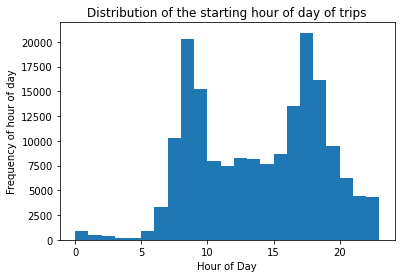

In [21]:
#investigating rides taken by the hour of day
# r['start_hour'].describe()
binsize = 1
bins = np.arange(0, r['start_hour'].max()+binsize, binsize)
plt.hist(data = r, x ='start_hour', bins = bins)
plt.xlabel("Hour of Day")
plt.title("Distribution of the starting hour of day of trips")
plt.ylabel("Frequency of hour of day")

The hour of day has a bimodal distribution with one peak between 5 to 10 and the other between 15 to 20. There is a steady frequency between 10 and 15 hours. However, 0 to 5 hours have a relatively low frequency.

Next, the variable of interest; end day

Which day of the month are most trips taken?

Text(0.5, 1.0, 'Distribution of the End day of the Month (March)')

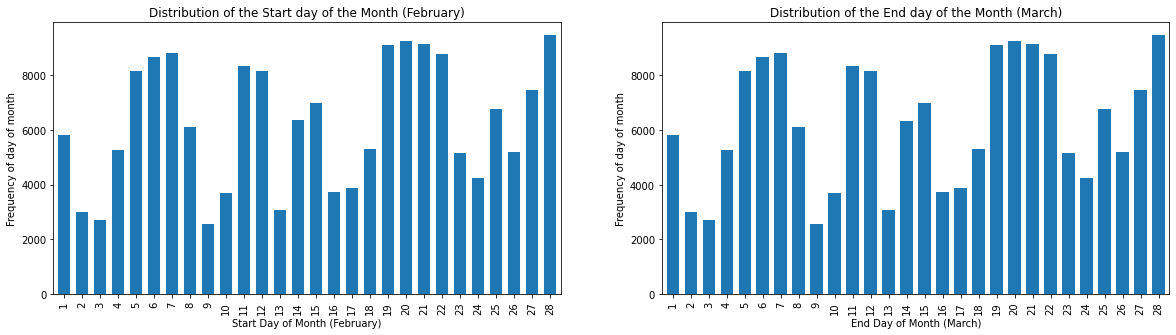

In [22]:
#Plot of start day of month

plt.subplot(1,2,1)
# plt.figsize=[12,5])
r['start_day_of_month'].value_counts().sort_index().plot(kind='bar', width=0.7, figsize = (20,5))
plt.xlabel("Start Day of Month (February)")
plt.ylabel("Frequency of day of month")
plt.title("Distribution of the Start day of the Month (February)")

plt.subplot(1,2,2)
r['end_day_of_month'].value_counts().sort_index().plot(kind='bar', width=0.7, figsize = (20,5))
plt.xlabel("End Day of Month (March)")
plt.ylabel("Frequency of day of month")
plt.title("Distribution of the End day of the Month (March)")

From the month of February, there is a group rise and fall consecutively through the days in the month. There is a similar progression in the end month of March. The visualisation shows that mopst riders took rides on the 28th of February and ended on the 28th of March.

Which day of the week do most trips end?

Text(0.5, 1.0, 'Distribution of End day of trips (Day of the week)')

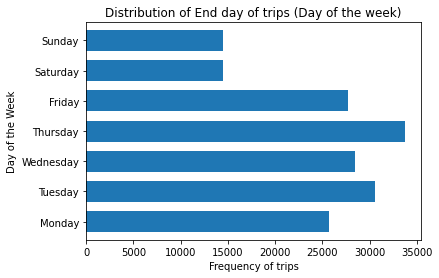

In [23]:
#Plot frequency of end day of the week on a bar chart
r['end_day'] = pd.Categorical(r['end_day'], daysofWeek)
r['end_day'].value_counts().sort_index().plot(kind='barh', width=0.7)
plt.ylabel("Day of the Week")
plt.xlabel("Frequency of trips")
plt.title("Distribution of End day of trips (Day of the week)")

End day of the week shows a close marking between Saturday and Sunday. However, Thursday has the highest frequency signifying that more riders ended their rides on Thursday. Interestingly, between the start day and the end day, more riders started on Thursday of the month of February and also ended on Thursday in the month of March.

The next feature of interest, end hour of day

Which hour of the day do most trips end?

Text(0, 0.5, 'Frequency of hour of day')

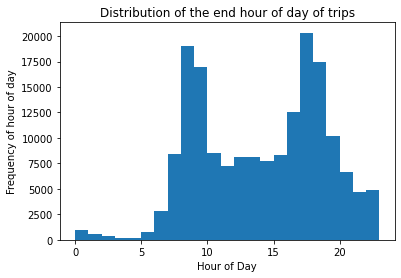

In [24]:
#investigating rides taken by the hour of day
binsize = 1
bins = np.arange(0, r['end_hour'].max()+binsize, binsize)
plt.hist(data = r, x ='end_hour', bins = bins)
plt.xlabel("Hour of Day")
plt.title("Distribution of the end hour of day of trips")
plt.ylabel("Frequency of hour of day")

The end hour of day has a bimodal distribution with one peak between 5 to 10 and the other between 15 to 20. There is a steady frequency between 10 and 15. However, 0 to 5 hours have a relatively low frequency. Though this distribution is identical to the start hour of day, the first bar of the bimodal bars in this visualisation is a little lower compared to the start hour of day from the previous visualisation.

Next, the variable of interest; age of riders

Which age category of riders take the most trips?

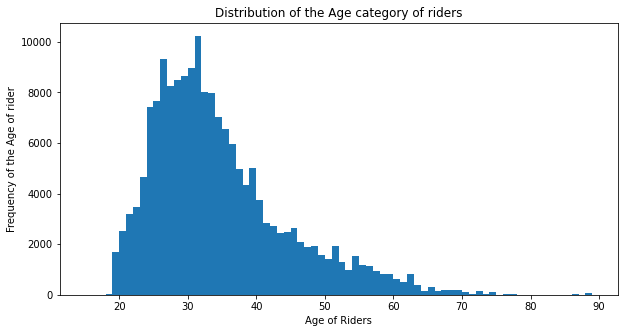

In [25]:
#Investigting the age of riders
binsize = 1
bins = np.arange(15, r['member_age'].max()+binsize, binsize)

plt.figure(figsize=[10,5])
plt.hist(data = r, x ='member_age', bins = bins)
plt.xlabel("Age of Riders")
plt.ylabel("Frequency of the Age of rider")
plt.title("Distribution of the Age category of riders")
plt.show()

The distribution of the member age is skewed to the right, depicting that the most riders who took trips were between the ages of 20 and 50. The distribution however, has a tail end with less riders within ages greater than 70.

Next, the user types

What percentage of rides are Subscribers?

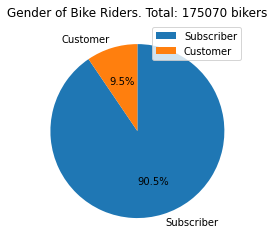

In [26]:
#investigating the user types
type_count = r['user_type'].value_counts()
plt.pie(type_count, labels=type_count.index, startangle=90, counterclock=False, autopct="%1.1f%%")
plt.legend()
plt.title("Gender of Bike Riders. Total: 175070 bikers")
plt.show()

The user type distribution is visualized on a pie chart with the percentages indicated on their corresponding wedges. The percentage of subscribers is portrayed to have a greater percentage of 81% greater than that of customers. Thus, a greater portion of the riders who took the trip are subscribers.

Next, the visuaisation of gender

Which gender takes the most trips?

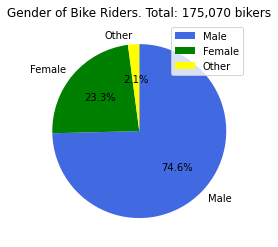

In [27]:
#investigation of the gender of riders
gender_counts = r['member_gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, startangle=90, counterclock=False, autopct="%1.1f%%", colors=['royalblue', 'green', 'yellow'])
plt.legend()
plt.title("Gender of Bike Riders. Total: 175,070 bikers")
plt.show()

The visualisation portrays the percentages of the gender of the bike riders. Male bikers have over half of the pie (74.6%) with the Female and Other gender sharing 25.4%.

Next, the bivariate exploration of 

In [28]:
r.shape   

(175070, 14)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the start day had a close marking between Saturday and Sunday. The start day distribution is identical to the end day distribution with a little distinction in the values which is difficult to identify. Meanwhile, the start hour of day and end hour of day had a bimodal distribution and are identical.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The features of interest were rather smooth, however, the age of the bikers had outliers that skewed the distribution to the right. Thus, I removed the outliers of ages beyond 90 years.

## Bivariate Exploration


In [29]:
numeric_values = ['start_hour', 'end_hour', 'duration_min', 'member_age']
categorical_val = ['member_gender', 'start_day','end_day', 'user_type', 'start_day_of_month', 'end_day_of_month']

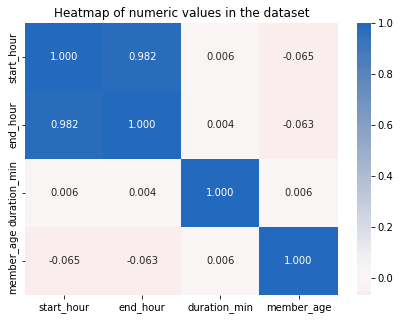

In [30]:
#pairwie correlation plot
plt.figure(figsize=[7,5])
sb.heatmap(r[numeric_values].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("Heatmap of numeric values in the dataset")
plt.show()

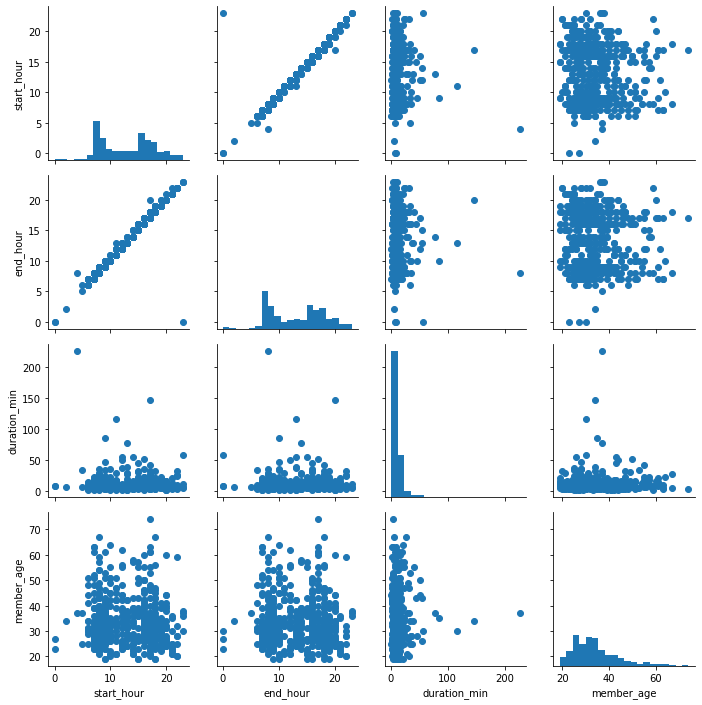

In [31]:
# plotting matrix: sample 500 rides
r_sample = r.sample(n=500, replace = False)
g = sb.PairGrid(data = r_sample, vars = numeric_values)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)


"start_hour" and "end_hour" also shows a strong correlation regardless of the diminutive outliers. Furthermore, the "duration_min" and "start_hour" don't have a strong correlation neither does the end_hour, thus, further analysis will not be considered between these variables.

Next, how start day and end day correlate with the categorical variables


How does start day and end day correlate with the categorical variables?

<Figure size 720x720 with 0 Axes>

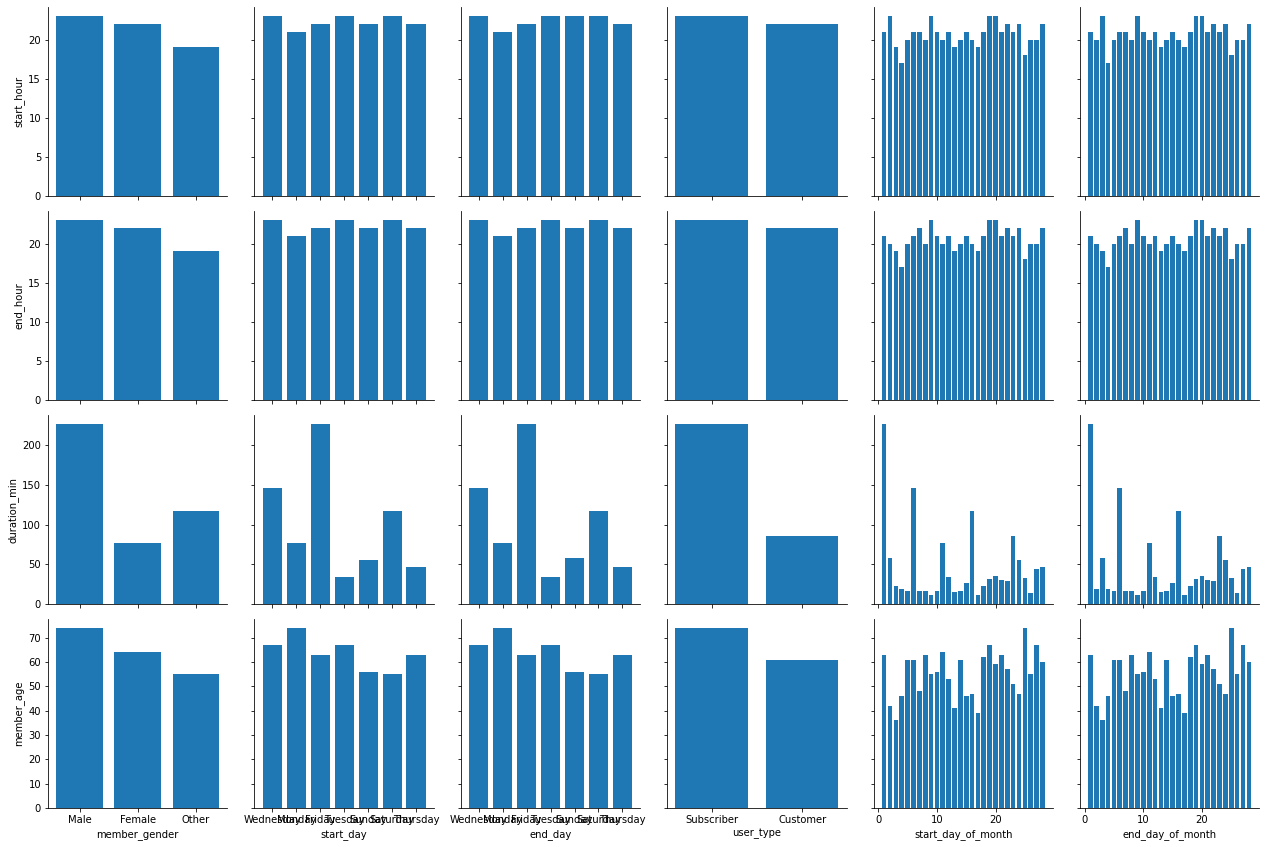

In [32]:
def boxplt(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = r_sample, y_vars = ['start_hour', 'end_hour', 'duration_min', 'member_age'], x_vars = categorical_val,
                height = 3, aspect = 1.0)
g.map(plt.bar)
plt.show();

The member age along with the gender follows a decrease from Male through Female to Other. However, for the plot of the duration on the gender, Female dropped relative to the member age. According to the duration visualisation on the gender, males took more minutes to complete a trip as compared to females and those of other gender.

There is an increase in subscribers than customers in terms of the member age. Also, for duration, there is a total ramps up for subscribers and a decrease for customers, thus, subscribers took more time to complete their trip.

In [33]:
# bars_data = pd.DataFrame({''})
r['user_type'].value_counts()

Subscriber    158445
Customer       16625
Name: user_type, dtype: int64

Which gender the most trips and on which day of the week?

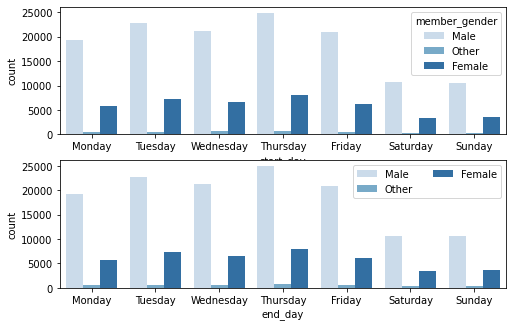

In [34]:
# since there's only two subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: start_day vs member_gender
plt.subplot(3, 1, 1)
sb.countplot(data = r, x = 'start_day', hue = 'member_gender', palette = 'Blues', order=r['start_day'].value_counts().sort_index().index)

# subplot 2: end_day vs member_gender
ax = plt.subplot(3, 1, 2)
sb.countplot(data = r, x = 'end_day', hue = 'member_gender', palette = 'Blues', order=r['end_day'].value_counts().sort_index().index)
ax.legend(ncol = 2)

plt.show()

The clustered bar chart shows that of all the days of the week, both start and end days, male riders took trips more than the females. However, of all the days of the week, the count of females who started and ended on Thursday slightly superseeds the other days. 

In [35]:
r.head()

,duration_sec,user_type,member_gender,bike_share_for_all_trip,start_month,start_day,start_day_of_month,start_hour,end_month,end_day,end_day_of_month,end_hour,member_age,duration_min
0,52185,Customer,Male,No,2,Thursday,28,17,3,Friday,1,8,35,869.75
2,61854,Customer,Male,No,2,Thursday,28,12,3,Friday,1,5,47,1030.90
3,36490,Subscriber,Other,No,2,Thursday,28,17,3,Friday,1,4,30,608.17
4,1585,Subscriber,Male,Yes,2,Thursday,28,23,3,Friday,1,0,45,26.42
5,1793,Subscriber,Male,No,2,Thursday,28,23,3,Friday,1,0,60,29.88


How does start hour of the day relate with end hour of the day?

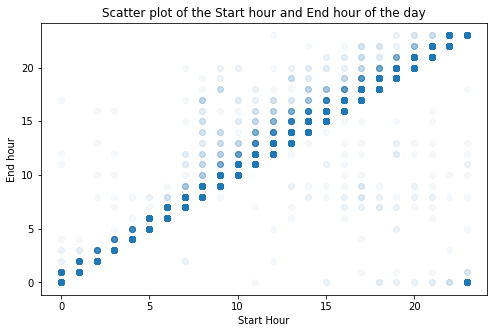

In [36]:
#Scatter plot for start hour and end hour
plt.figure(figsize=[8,5])
plt.scatter(data = r, x = 'start_hour', y = 'end_hour', alpha = 0.04)
plt.xlabel("Start Hour")
plt.ylabel("End hour")
plt.title("Scatter plot of the Start hour and End hour of the day")
plt.show()

The distribution of the start_hour and the end_hour has many outliers, however, when I used the transparency, the plot shows a positive correlation between the two variables. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The start hour and end hour portends a positive correlation, thus, as the start hour increases, the end hour also increases. Progressively, for every addition of an hour, there are more riders taking the trip so as the end hour for riders ending their trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The other features showed no ostensible correlation

## Multivariate Exploration


How does the gender, user type, start and end hour related?

c:\users\deggie\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


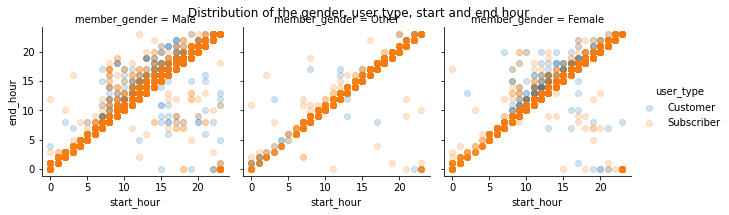

In [37]:

g = sb.FacetGrid(data = r, col='member_gender', hue = 'user_type', size = 3, col_wrap = 3)
g.map(plt.scatter, 'start_hour', 'end_hour', alpha = 1/5)
g.fig.suptitle("Distribution of the gender, user type, start and end hour")
g.add_legend()

Plotting gender, "start_hour" and "end_hour" on a feceted scatter plot, I observe that subscribers exceed the customers on each facet. However, on the Female facet, I see a little increase in the customers as compared to the Male and Other gender. 

How does the start hour, end hour and duration relate

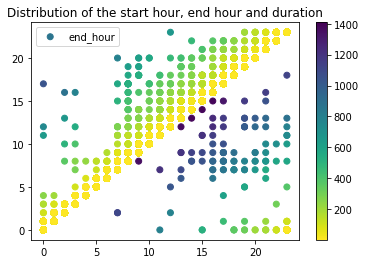

In [38]:
# create faceted heat maps on levels of the cut variable
plt.scatter(data = r, x = 'start_hour', y = 'end_hour', c = 'duration_min', cmap = 'viridis_r')
plt.colorbar()
plt.legend()
plt.title("Distribution of the start hour, end hour and duration")
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The start and end hours shows a a positive correlation, however, on the gender, more deep points are seen for Females than Males and Other.
### Were there any interesting or surprising interactions between features?

> Though the bivariate plots portrayed an overshadow of subscribers on customers, the multivariate plot dipicts an increase in the customers. Thus, more riders who are females took trips as compared tothe riders who are males and of the other gender. 

## Conclusions
>The dataset comprised mainly of categorical variables, and thus, most explorations were from categorical explorations through univariate and bivariate exploration.
The rides took place from February to March, with most riders starting their trips on Thursday and surprisingly ending on Thursday in March.
It is inferred from the exploration that, the average ride took about 12 minutes to complete their trip and majority of riders started their trips on Thursday between 15 and 20 hours.
